# Dogs vs Cats

# Kaggle Dataset의 일부를 이용한 개, 고양이 구분

# Dog Image:1,111개, Cat image:1,111개, 총 2,222개

# 출처 : pontoregende GitHub

## one-hot encoding -> logistic regreesion

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
path = 'dataset/train'

In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

## Train set 만들기

In [5]:
## used for resize and in our model
ROW, COL = 96, 96  # 사진마다 사이즈가 달라서 통일시켜준다
 
dogs, cats = [], []    # x y 파일을 준비한다.
y_dogs, y_cats = [], []

In [6]:
dog_path = os.path.join(path, 'dog.5*')   # 도그 5 몇개가 있는지 확인한다.
len(glob(dog_path))

1111

In [7]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)  # 이미지 일고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)  # 컬러 입히고
    dog = cv2.resize(dog, (ROW, COL))  # 96 사이즈로 리사이즈
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [8]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [9]:
classes = ['dog', 'cat']

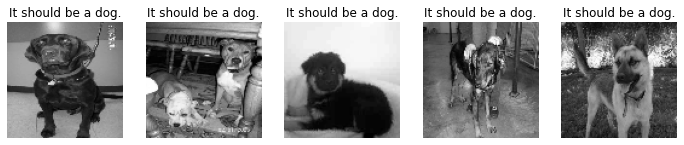

In [10]:
# 이미지가 제대로 들어갔는지 확인한다.
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))
plt.show()

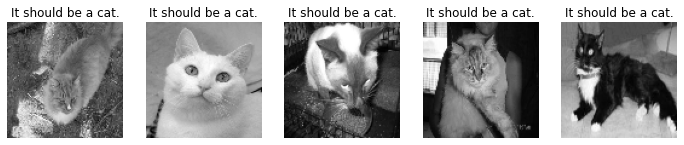

In [11]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [12]:
## just change the labels for 0 and  1   # 사진 파일은 0과 1로 변경한다.
y_dogs =[1 for item in enumerate(dogs)]
y_cats =[0 for item in enumerate(cats)]

In [13]:
y_dogs[0], y_cats[0]

(1, 0)

In [14]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [15]:
X_train = np.concatenate((dogs,cats), axis=0)
Y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [16]:
X_train.shape, Y_train.shape

((2222, 96, 96, 1), (2222,))

In [17]:
len(X_train)

2222

# test set dog vs cat 만들기

In [18]:
dogs, cats = [], []    # x y 파일을 준비한다.
y_dogs, y_cats = [], []

In [19]:
dog_path = os.path.join(path, 'cat.12*')   # 도그 5 몇개가 있는지 확인한다.
len(glob(dog_path))

611

In [20]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)  # 이미지 일고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)  # 컬러 입히고
    dog = cv2.resize(dog, (ROW, COL))  # 96 사이즈로 리사이즈
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [21]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [22]:
classes1 = ['dog', 'cat']

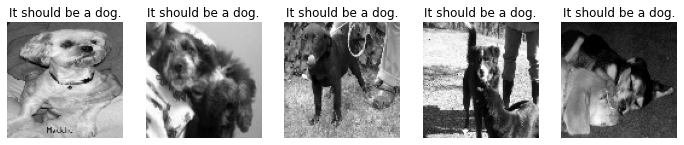

In [23]:
# 이미지가 제대로 들어갔는지 확인한다.
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('It should be a {}.'.format(classes1[0]))
plt.show()

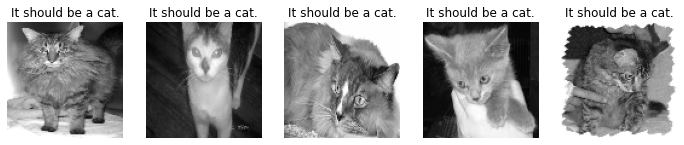

In [24]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes1[1]))
plt.show()

In [25]:
y_dogs =[1 for item in enumerate(dogs)]
y_cats =[0 for item in enumerate(cats)]

In [26]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [27]:
dogs.shape

(611, 96, 96, 1)

In [28]:
X_test = np.concatenate((dogs,cats), axis=0)
Y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [29]:
X_test.shape

(1222, 96, 96, 1)

In [30]:
len(X_test)

1222

In [31]:
## here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='elu'),
    Conv2D(64, (3,3), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(1000, activation='elu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [32]:
# 'adam' Adam() 두가지 방법이 있음
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [33]:
# to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습

In [34]:
model.fit(X_train, Y_train, batch_size=32, epochs=40, validation_split=0.2, shuffle=True,
          callbacks=[checkpointer])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.9919 - accuracy: 0.5903
Epoch 00001: val_loss improved from inf to 0.95558, saving model to model/dogs_vs_cats-cnn-01-0.9556.hdf5
1777/1777 [==============================] - 35s 20ms/sample - loss: 0.9886 - accuracy: 0.5914 - val_loss: 0.9556 - val_accuracy: 0.2876
Epoch 2/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.5614 - accuracy: 0.7057
Epoch 00002: val_loss improved from 0.95558 to 0.84731, saving model to model/dogs_vs_cats-cnn-02-0.8473.hdf5
1777/1777 [==============================] - 34s 19ms/sample - loss: 0.5605 - accuracy: 0.7068 - val_loss: 0.8473 - val_accuracy: 0.4337
Epoch 3/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.4802 - accuracy: 0.7631
Epoch 00003: val_loss improved from 0.84731 to 0.49234, saving model to model/dogs_vs_cats-cnn-03-0.4923.hdf5
1777/1777 [==============================] - 34s 19ms/sampl

Epoch 29/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9909
Epoch 00029: val_loss did not improve from 0.49234
1777/1777 [==============================] - 30s 17ms/sample - loss: 0.0196 - accuracy: 0.9910 - val_loss: 3.3397 - val_accuracy: 0.5573
Epoch 30/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9909
Epoch 00030: val_loss did not improve from 0.49234
1777/1777 [==============================] - 30s 17ms/sample - loss: 0.0263 - accuracy: 0.9910 - val_loss: 3.0394 - val_accuracy: 0.6472
Epoch 31/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9903
Epoch 00031: val_loss did not improve from 0.49234
1777/1777 [==============================] - 30s 17ms/sample - loss: 0.0277 - accuracy: 0.9899 - val_loss: 3.7850 - val_accuracy: 0.5483
Epoch 32/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9886
Epoch 00032: val_loss did not improve fr

In [38]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-03-0.4923.hdf5')

In [39]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

1222/1222 - 4s - loss: 0.7007 - accuracy: 0.6342
MODEL ACCURACY: 0.63421
